In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/raw/non_rand_discount.csv",sep=";")

In [3]:
# module 1: Estimating the Profitability of Discounts

In [4]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spend_1m_baby          15000 non-null  int64  
 1   spend_2m_baby          15000 non-null  int64  
 2   spend_3m_baby          15000 non-null  int64  
 3   spend_4m_baby          15000 non-null  int64  
 4   spend_5m_baby          15000 non-null  int64  
 5   spend_6m_baby          15000 non-null  float64
 6   spend_1m_clothes       15000 non-null  int64  
 7   spend_2m_clothes       15000 non-null  float64
 8   spend_3m_clothes       15000 non-null  float64
 9   spend_4m_clothes       15000 non-null  float64
 10  spend_5m_clothes       15000 non-null  float64
 11  spend_6m_clothes       15000 non-null  float64
 12  spend_1m_health        15000 non-null  int64  
 13  spend_2m_health        15000 non-null  int64  
 14  spend_3m_health        15000 non-null  int64  
 15  sp

In [5]:
df.discount

0        US$ 125.0
1         US$ 75.0
2         US$ 50.0
3         US$ 10.0
4        US$ 100.0
           ...    
14995    US$ 110.0
14996    US$ 135.0
14997      US$ 0.0
14998    US$ 145.0
14999     US$ 30.0
Name: discount, Length: 15000, dtype: object

In [6]:
# defining a function that replaces US$ for nothing in order to get rid of the non-numerical values
def remove_symbols(discount):
  return float(discount.replace('US$ ', '')) 

In [7]:
remove_symbols("US$ 110.0")

110.0

In [8]:
df.discount = df.discount.apply(remove_symbols)


In [9]:
df2 = df[['sales','discount','profit','age','cust_state','tenure','sales_prediction_bins','sales_prediction']]
df2.head()

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825
3,1461.96,10.0,61.64,31,BA,7,1,919.720735
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681


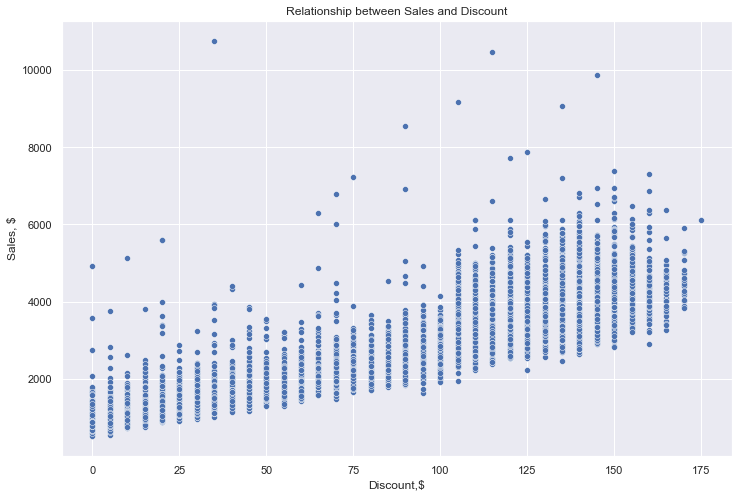

In [10]:
# relationship between discount and sales
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales", data=df)
plt.ylabel('Sales, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales and Discount')
plt.show()

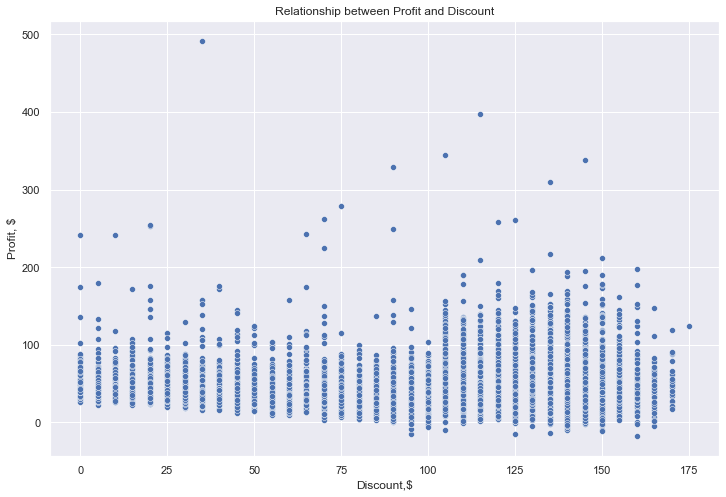

In [11]:
# relationship between discount and profits 
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="profit", data=df)
plt.ylabel('Profit, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Profit and Discount')
plt.show()

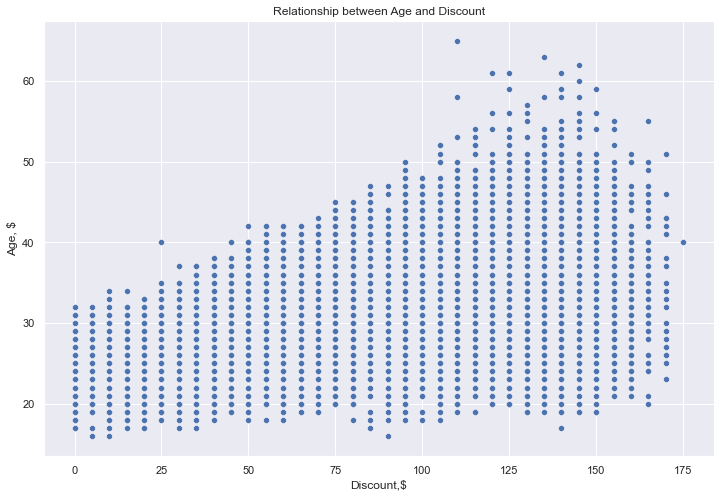

In [12]:
# relationship between age and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="age", data=df)
plt.ylabel('Age, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Age and Discount')
plt.show()

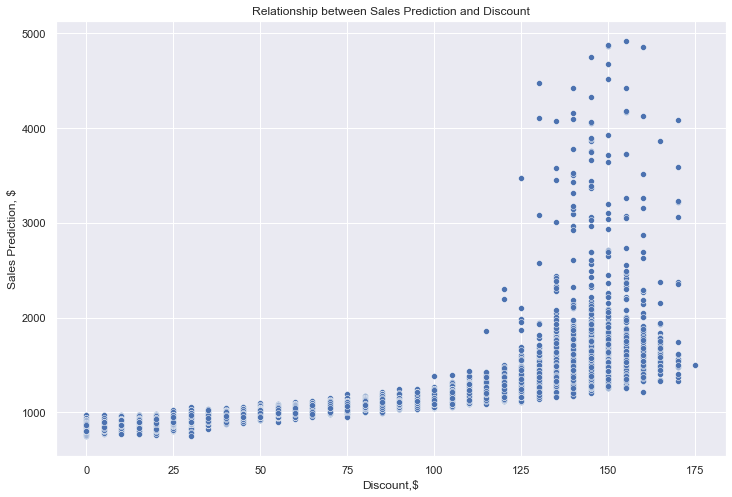

In [13]:
# relationship between sales prediction and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales_prediction", data=df)
plt.ylabel('Sales Prediction, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales Prediction and Discount')
plt.show()

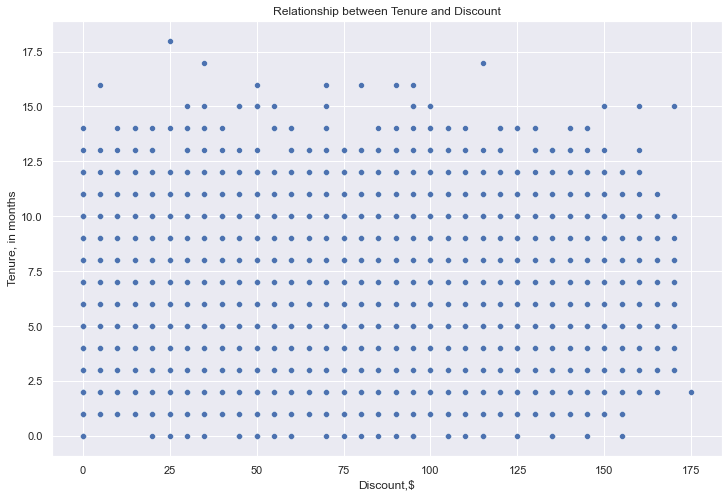

In [14]:
# relationship between tenure and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="tenure", data=df)
plt.ylabel('Tenure, in months')
plt.xlabel('Discount,$')
plt.title('Relationship between Tenure and Discount')
plt.show()

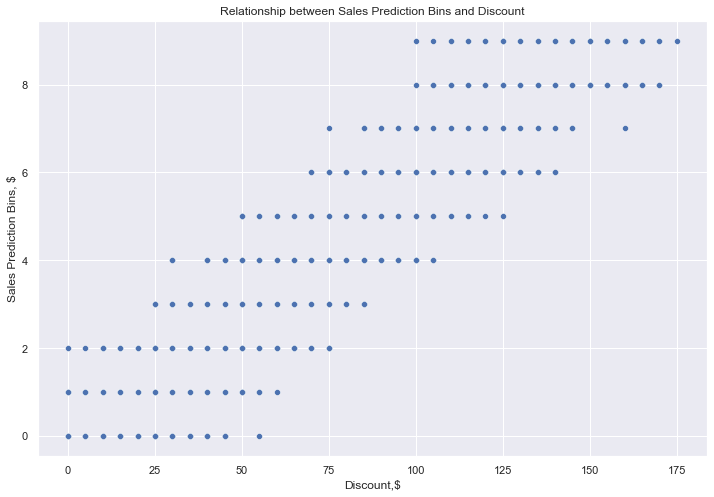

In [15]:
# This is not correct?
# I chose lmplot since it gives you a scatterplot with a linear regresion applied to it, which makes it easier to interpret the data
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales_prediction_bins", data=df)
plt.ylabel('Sales Prediction Bins, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales Prediction Bins and Discount')
plt.show()

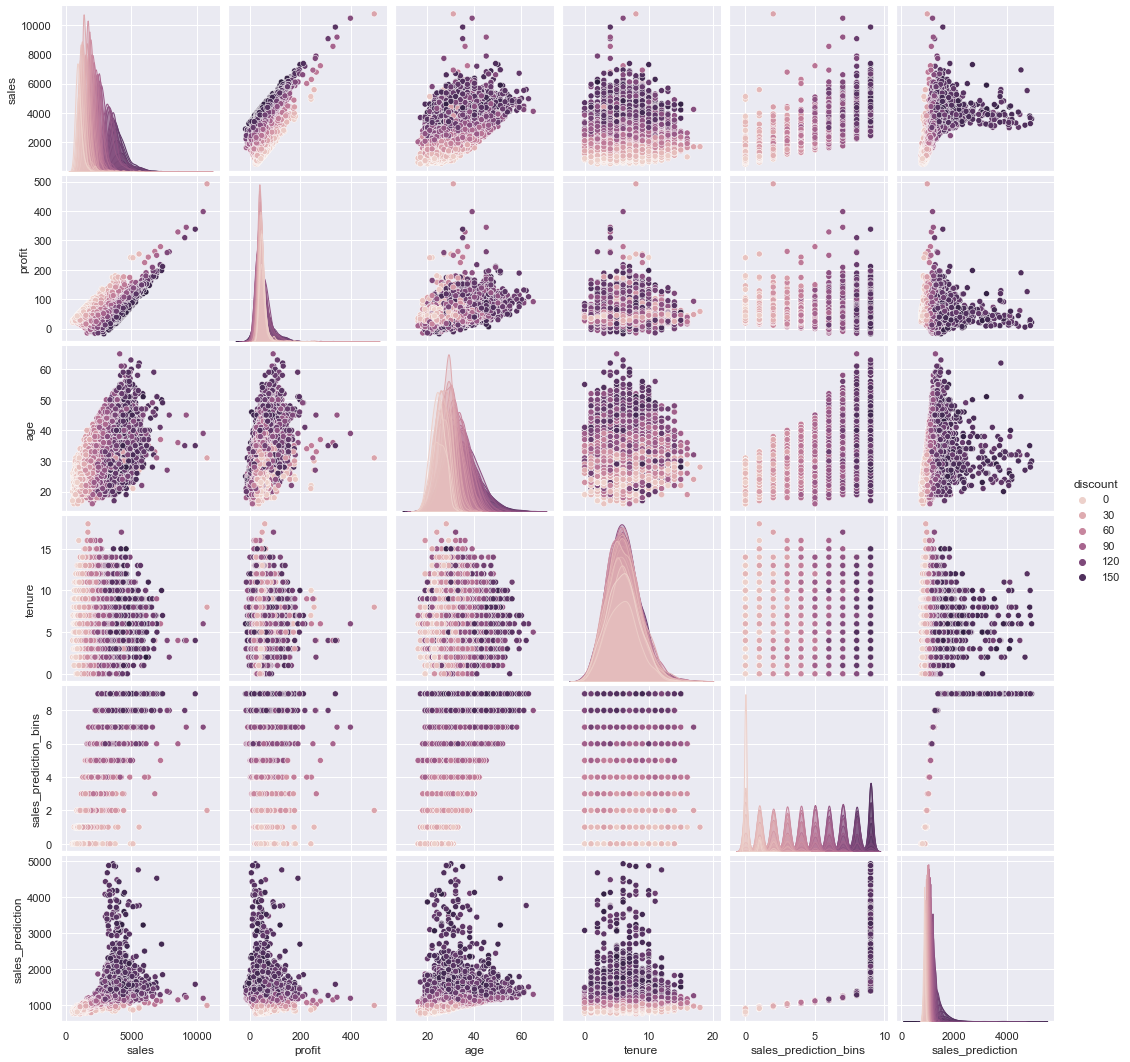

In [16]:
# Interesting comparison between df2 parameters and discount
sns.pairplot(df2, hue='discount')
plt.show()

In [17]:
# Looking at the regression of discount on profits we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='sales ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 6.341e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:10:30   Log-Likelihood:            -1.1363e+05
No. Observations:               15000   AIC:                         2.273e+05
Df Residuals:                   14998   BIC:                         2.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.0

In [18]:
discount = np.array([0,175])
sales = 21.9248*discount + 804.5246

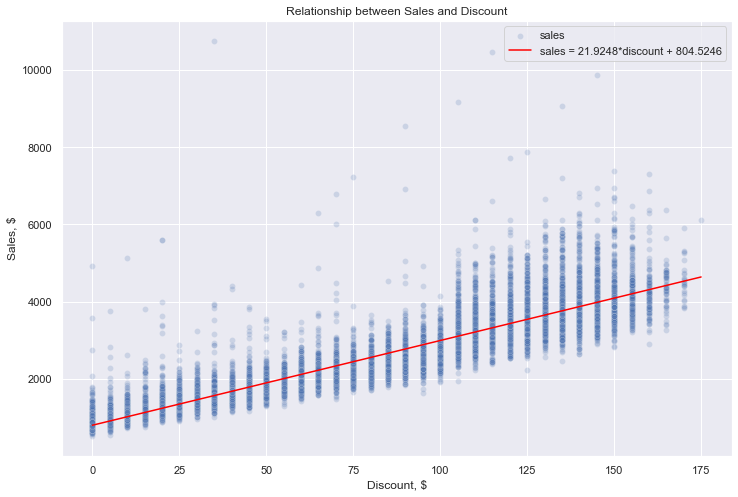

In [19]:
# It is a good fit since R-squared is 0.809, which is pretty close to 1 and the linear regresion graph confirms it
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales", data=df, alpha=0.2, label='sales')
sns.lineplot(x=discount,y=sales, color='red', alpha=1, label='sales = 21.9248*discount + 804.5246')
plt.ylabel('Sales, $')
plt.xlabel('Discount, $')
plt.legend()
plt.title('Relationship between Sales and Discount')
plt.show()

In [20]:
# Looking at the regression of discount on profits we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='profit ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     303.4
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.71e-67
Time:                        13:10:31   Log-Likelihood:                -68395.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.0

In [21]:
discount = np.array([0,175])
profit = 0.0743*discount + 39.4217

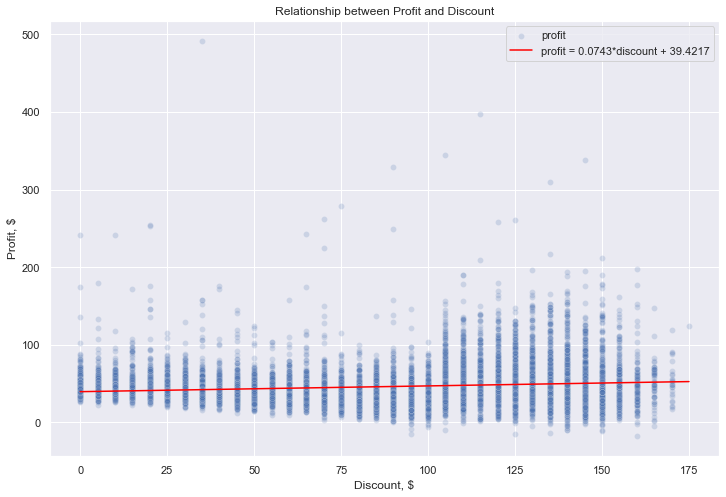

In [22]:
# Although the linear regresion graph says that it is a good fit, R-squared is pretty close to 0. This gives us strong reasons to believe this positive relationship is biased since we are giving more discounts to customers which we already expect to buy more. 
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="profit", data=df, alpha=0.2, label='profit')
sns.lineplot(x=discount,y=profit, color='red', alpha=1, label='profit = 0.0743*discount + 39.4217')
plt.ylabel('Profit, $')
plt.xlabel('Discount, $')
plt.legend()
plt.title('Relationship between Profit and Discount')
plt.show()

In [23]:
# Looking at the regression of sales_prediction and age on discount we can expect discounts to change ___ as age and sales_prediction changes
mod = smf.ols(formula='discount ~ sales_prediction + age', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:10:31   Log-Likelihood:                -71057.
No. Observations:               15000   AIC:                         1.421e+05
Df Residuals:                   14997   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -102.3049      1.299  

In [24]:
# 3 dimensions - hyperplane
# x = # It is a good fit since R-squared is 0.809, which is pretty close to 1
# x = np.array([10,20,30,40,50,60,70,80,90,100])
# y = np.array([100,200,300,400,500,600,700,800,900,1000])
# plt.plot(x,y,'o')
# m = 21.9248
# b = 804.5246
# m,b = np.polyfit(x,y,1)
# plt.plot(x,m*x+b)

In [25]:
# Q4 Relationship between discounts and profits
# Q5 Draw a causal graph

In [26]:
# In order to estimate the impact of discounts on profits, we have to compare customers with the same sales predictions.


In [27]:
mod = smf.ols(formula='discount ~ C(sales_prediction_bins)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:10:31   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [28]:
# Create a new dataframe df_discount_res that is the original one plus a column with the above model's discount residual, plus the discounts average
df_discount_res = df2["discount"] - sales_prediction_bins + df2["discount"].mean()
df_discount_res.head

NameError: name 'sales_prediction_bins' is not defined

In [ ]:
# module 2: Regression Discontinuity Desing

In [29]:
df3 = pd.read_csv("data/raw/rdd_data.csv")

In [30]:
# df3.describe()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_1m_baby       10000 non-null  int64  
 1   spend_2m_baby       10000 non-null  int64  
 2   spend_3m_baby       10000 non-null  int64  
 3   spend_4m_baby       10000 non-null  int64  
 4   spend_5m_baby       10000 non-null  int64  
 5   spend_6m_baby       10000 non-null  float64
 6   spend_1m_clothes    10000 non-null  int64  
 7   spend_2m_clothes    10000 non-null  float64
 8   spend_3m_clothes    10000 non-null  float64
 9   spend_4m_clothes    10000 non-null  float64
 10  spend_5m_clothes    10000 non-null  float64
 11  spend_6m_clothes    10000 non-null  float64
 12  spend_1m_health     10000 non-null  int64  
 13  spend_2m_health     10000 non-null  int64  
 14  spend_3m_health     10000 non-null  int64  
 15  spend_4m_health     10000 non-null  int64  
 16  spend

In [32]:
df3.discount

0         $ 4.0
1         $ 2.0
2       $ 224.0
3         $ 1.0
4        $ 13.0
         ...   
9995    $ 252.0
9996    $ 257.0
9997     $ 35.0
9998    $ 136.0
9999     $ 74.0
Name: discount, Length: 10000, dtype: object

In [33]:
# defining a function that replaces $ for nothing in order to get rid of the non-numerical values
def remove_symbols_2(discount):
  return float(discount.replace('$ ', '')) 

In [34]:
remove_symbols_2("$ 110.0")

110.0

In [35]:
df3.discount = df3.discount.apply(remove_symbols_2)

In [36]:
# reminder to check if I need to delete any symbols (cleaning data) 
df4 = df3[['sales','discount','profit','age','gender','cust_state','tenure']]
df4.head()

,sales,discount,profit,age,gender,cust_state,tenure
0,1442.30,4.0,66.93,30,0.0,MA,19
1,883.96,2.0,41.33,30,1.0,MG,20
2,4900.67,224.0,15.88,29,0.0,RJ,21
3,1547.48,1.0,74.99,36,1.0,BA,18
4,1335.23,13.0,52.41,37,0.0,PB,19


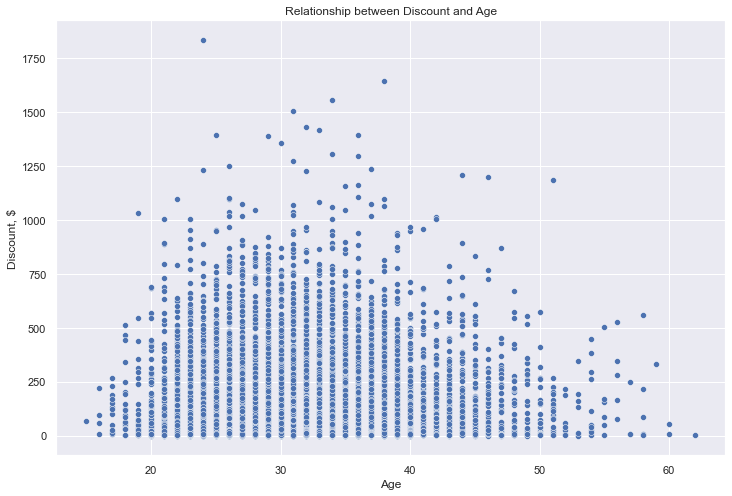

In [37]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="age", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Age')
plt.title('Relationship between Discount and Age')
plt.show()

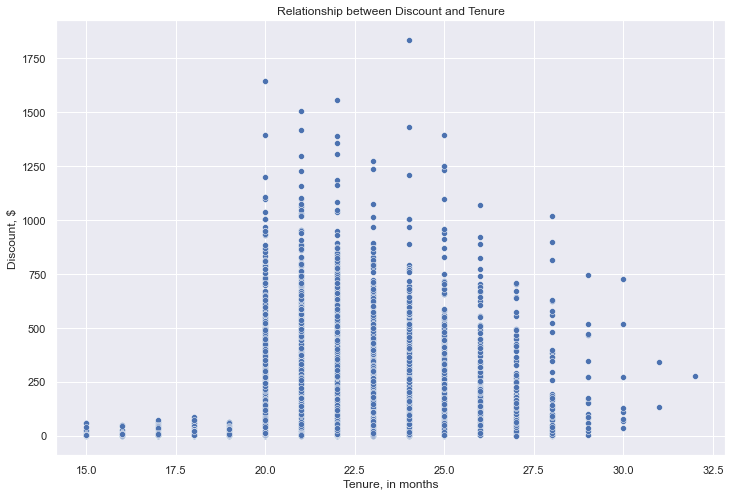

In [50]:
# Identify a running variable in which the discount treatment is discontinuous. Huge discontinuity observed.
# This is a running variable in which the discount treatment is discontinuous.
plt.figure(figsize=(12,8))
sns.scatterplot(x="tenure", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Discount and Tenure')
plt.show()

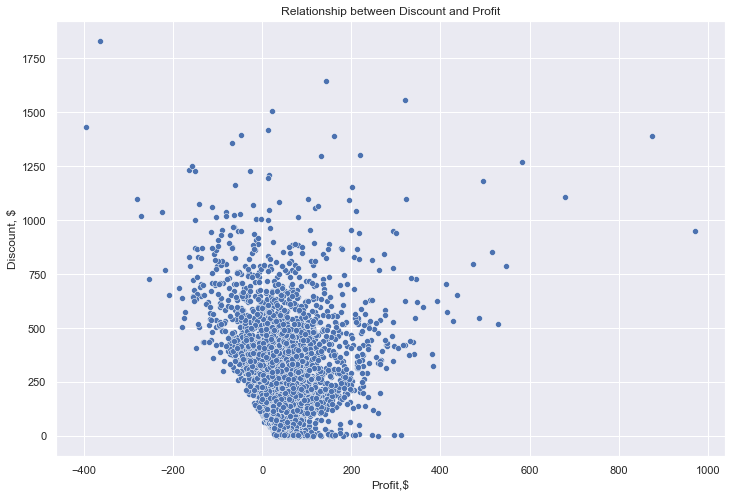

In [51]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="profit", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Profit,$')
plt.title('Relationship between Discount and Profit')
plt.show()

In [62]:
sales_mean = df3['sales'].mean()
print(sales_mean)
aggregate_tenure = df3['tenure'].sum()
print(aggregate_tenure)
profits_mean = df3['profit'].mean()
print(profits_mean)

3920.136075
209859
47.64593


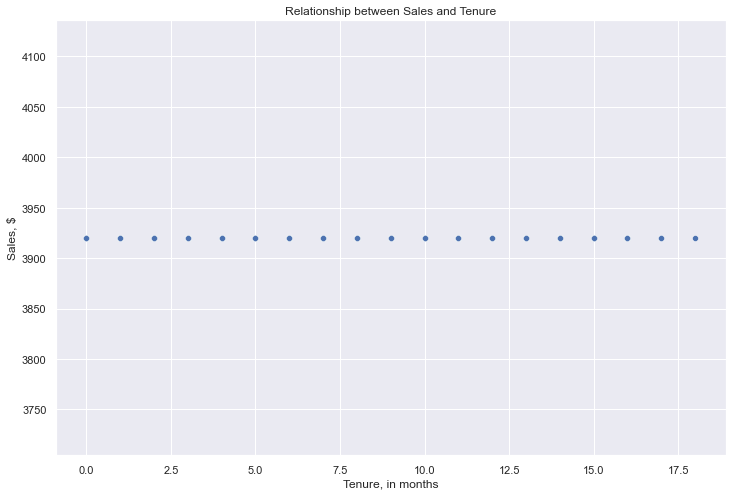

In [61]:
# Aggregate your dataframe by tenure and aggregate sales with the mean???
# The discountinuity in discounts translates to a discontinuity in sales
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y=sales_mean, data=df)
plt.ylabel('Sales, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Sales and Tenure')
plt.show() 

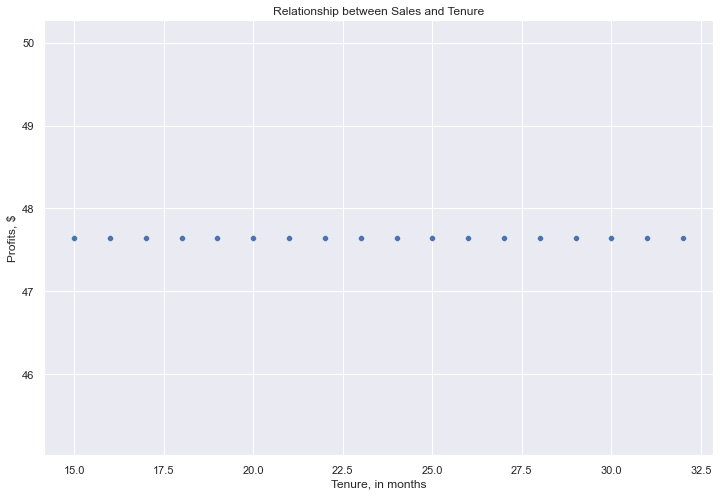

In [63]:
# Aggregate your dataframe by tenure and aggregate profits with the mean???
# The discontinuity in discounts does not translate to a discontinuity in sales
plt.figure(figsize=(12,8))
sns.scatterplot(x="tenure", y=profits_mean, data=df3)
plt.ylabel('Profits, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Sales and Tenure')
plt.show() 

In [70]:
# Grouping by tenure in order to get number of customers
number_customers = df3.groupby('tenure')['tenure'].sum()
print(group_tenure)
df['number_customers'] = pd.Series([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

tenure
15      495
16     2528
17     7973
18    16272
19    24187
20    30880
21    34965
22    31306
23    23851
24    16488
25    10075
26     5148
27     3294
28     1512
29      551
30      240
31       62
32       32
Name: tenure, dtype: int64


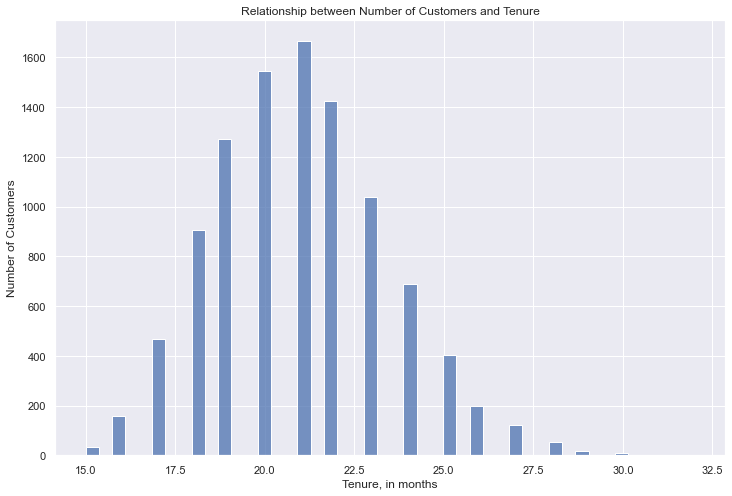

In [84]:
# With the aggregated data, plot the tenure on the x-axis and the number of customers on the y-axis. Esta a escala?
plt.figure(figsize=(12,8))
sns.histplot(data=df3, x="tenure")
plt.ylabel('Number of Customers')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Number of Customers and Tenure')
plt.show() 



In [ ]:
# module 3: Difference in Differences

In [ ]:
# module 4: Personalizing Discounts

In [ ]:
# module 5: Double Machine Learning approach